In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sb 

from statsmodels.tsa.seasonal import seasonal_decompose 

import nbformat 
from IPython import get_ipython 
%matplotlib inline 
from pandas.plotting import lag_plot, autocorrelation_plot 

import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sb 

from pandas.plotting import lag_plot, autocorrelation_plot 
%matplotlib inline 
fem_birth = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0) 
fem_birth 
fem_birth['date'].dtype 
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d')   
fem_birth_data = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0, parse_dates=[0], date_format=dateparse)  
fem_birth_data  
fem_birth_data['date'].dtype 
fem_birth_data = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0, parse_dates=[0])     # parse_dates = [date_column]  
fem_birth_data    
fem_birth_data['date'].dtype 
fem_birth_data.shape 
print(f" Births in January : \n{ fem_birth_data[(fem_birth_data['date'] >= '1959-01-01') & (fem_birth_data['date'] <= '1959-02-01')] } ")  
 Births in January : 
         date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1

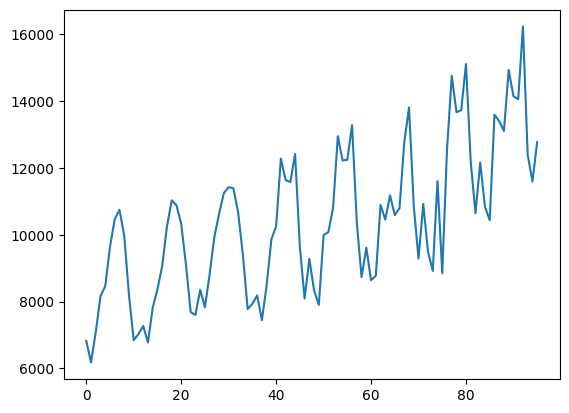

dataviz_fbth = fem_birth_data.copy() 
dataviz_fbth 
dataviz_fbth['births'].plot() 
# Ensure the index is a datetime index 
dataviz_fbth.index = pd.to_datetime(dataviz_fbth['date']) 
airl_miles_data.index = pd.to_datetime(airl_miles_data['Month'])  

# Convert datetime index to ordinal numbers
dataviz_fbth['date_ordinal'] = dataviz_fbth.index.map(pd.Timestamp.toordinal) 
airl_miles_data['month_ordinal'] = airl_miles_data.index.map(pd.Timestamp.toordinal)  

# print(dataviz_fbth) 
# print(airl_miles_data)  
dataviz_fbth 
airl_miles_data 
dataviz_fbth['births'].plot() 
airl_miles_data['MilesMM'].plot() 


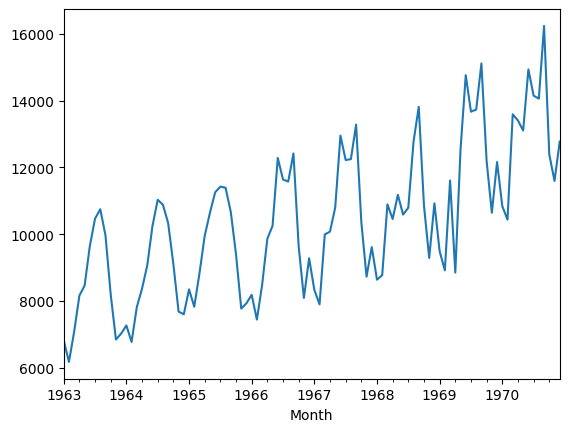

dataviz_fbth2 = dataviz_fbth[(dataviz_fbth['date'] >= '1959-01-01') & (dataviz_fbth['date'] <= '1959-01-20')].copy() 
dataviz_fbth2 
dataviz_fbth2['births'].plot() 
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth) 
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth2) 
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth, order=3)      
# sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth, order=2)     # order = Algebraic eq. power   
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth2, order=2)  
sb.regplot(data=airl_miles_data, x='month_ordinal', y='MilesMM') 


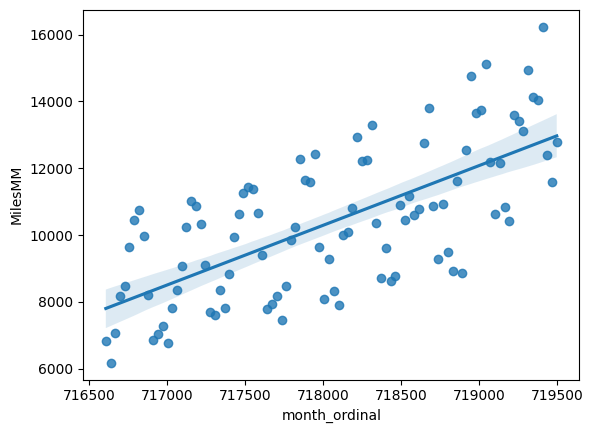

airl_miles_data['year'] = airl_miles_data['Month'].dt.year 
airl_miles_data 
airl_miles_data.groupby('year')['MilesMM'].mean()  
# dtset.groupby('<on_the_basis_of_col1>')['<grouped_content_as_per_col1>'] 
airl_miles_data.groupby('year')['MilesMM'].mean().plot()   


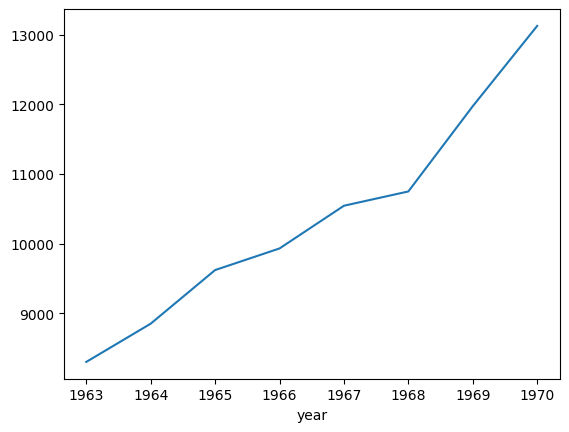

airl_miles_data['lag1'] = airl_miles_data['MilesMM'].shift(1) 
airl_miles_data 
sb.scatterplot(data=airl_miles_data, x='lag1', y='MilesMM') 


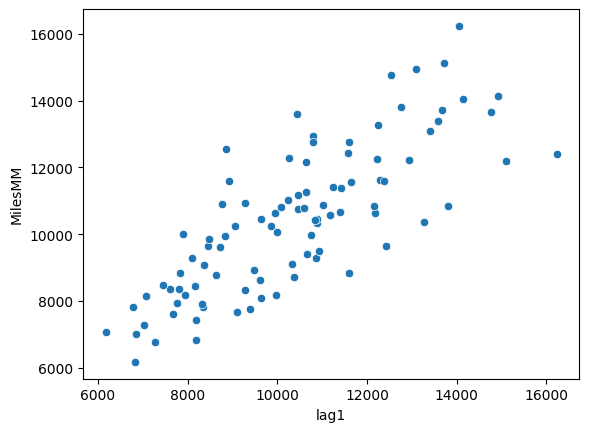

lag_plot(airl_miles_data['MilesMM']) 


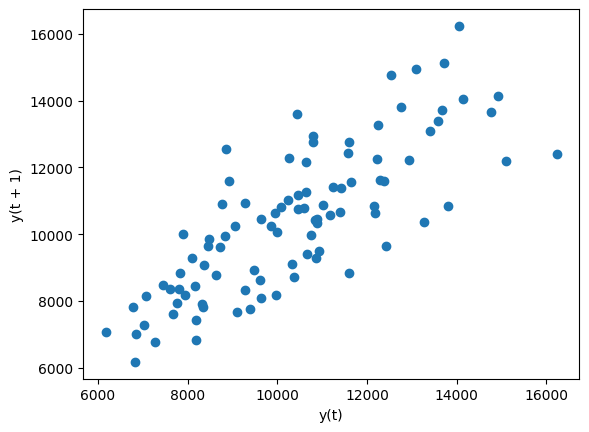

lag_plot(dataviz_fbth['births']) 
# Autocorrelatioin plot - Correlate all the lag values for the given column of the dataset 

autocorrelation_plot(airl_miles_data['MilesMM']) 


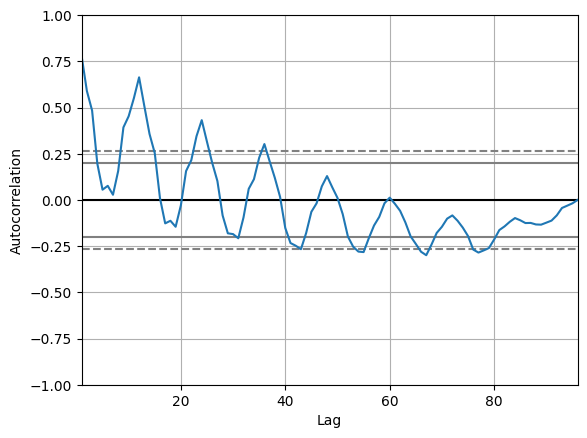

autocorrelation_plot(dataviz_fbth['births']) 
autocorrelation_plot(dataviz_fbth2['births']) 

Total female birth Data : 
        date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44


In [2]:
# %run "../Data_Preprocessing/preprocess_time_series.ipynb" 

with open("../Data_Preprocessing/preprocess_time_series.ipynb", "r", encoding="utf-8") as f:
    notebook1 = nbformat.read(f, as_version=4)

ipython = get_ipython() 

for cell in notebook1.cells:
    if cell.cell_type == "code":
        print(cell.source) 
        if ("fem_birth_data" in cell.source or "series" in cell.source or "features_fbth" in cell.source or "airl_miles_data" in cell.source or "airl_miles_data2" in cell.source): 
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try:
    print("\nTotal female birth Data : ")
    print(fem_birth_data.head())   # type: ignore 
    
except NameError as e:
    print(f"Variable not found: {e}")

In [3]:
fem_birth_data     # type: ignore 

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [4]:
series      # type: ignore 

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

In [5]:
features_fbth      # type: ignore 

,date,births,year,month,day,lag1,lag2,lag3,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,NaN,37.5,44.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,34.0,NaN,36.0,35.5,44.0,73.0
361,1959-12-28,52,1959,12,28,37.0,NaN,41.0,44.5,52.0,73.0
362,1959-12-29,48,1959,12,29,52.0,NaN,50.0,50.0,52.0,73.0
363,1959-12-30,55,1959,12,30,48.0,NaN,39.0,51.5,55.0,73.0


In [6]:
airl_miles_data      # type: ignore 

,Month,MilesMM,month_ordinal,year,lag1
Month,,,,,
1963-01-01,1963-01-01,6827,716606,1963,NaN
1963-02-01,1963-02-01,6178,716637,1963,6827.0
1963-03-01,1963-03-01,7084,716665,1963,6178.0
1963-04-01,1963-04-01,8162,716696,1963,7084.0
1963-05-01,1963-05-01,8462,716726,1963,8162.0
...,...,...,...,...,...
1970-08-01,1970-08-01,14057,719375,1970,14147.0
1970-09-01,1970-09-01,16234,719406,1970,14057.0
1970-10-01,1970-10-01,12389,719436,1970,16234.0


In [7]:
airl_miles_data2     # type: ignore 

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


# Resampling -  
Changing the frequency of the available data to match the frequency of required forecast. It is done for the purpose of feature engineering.   

Types of resampling - Upsampling and Downsampling  


Downsampling -  
When you decrease the frequency of the samples by removing some relevant samples.  
(e.g., from months to years, from minutes to hours, etc.)  

In [8]:
qtrly_miles_data = airl_miles_data.resample('QE', on='Month').mean()         # type: ignore 
qtrly_miles_data      # Quarterly miles flown data 

,MilesMM,month_ordinal,year,lag1
Month,,,,
1963-03-31,6696.333333,716636.000000,1963.0,6502.500000
1963-06-30,8756.000000,716726.333333,1963.0,7902.666667
1963-09-30,10392.333333,716818.000000,1963.0,10286.000000
1963-12-31,7356.333333,716909.666667,1963.0,8335.000000
1964-03-31,7287.666667,717001.333333,1964.0,7023.666667
1964-06-30,9229.333333,717092.333333,1964.0,8419.666667
1964-09-30,10748.333333,717184.000000,1964.0,10720.000000
1964-12-31,8132.000000,717275.666667,1964.0,9042.333333
1965-03-31,8336.000000,717367.000000,1965.0,7927.000000


In [9]:
qtrly_miles_data2 = airl_miles_data2.resample('QE', on='Month').mean()         # type: ignore 
qtrly_miles_data2 

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667
1964-06-30,9229.333333
1964-09-30,10748.333333
1964-12-31,8132.000000
1965-03-31,8336.000000


In [10]:
yrly_total_miles = airl_miles_data.resample('YE', on='Month').sum()      # type: ignore  
yrly_total_miles       # Yearly miles flown data 

,MilesMM,month_ordinal,year,lag1
Month,,,,
1963-12-31,99603,8601270,23556,92576.0
1964-12-31,106192,8605660,23568,105617.0
1965-12-31,115431,8610042,23580,115100.0
1966-12-31,119154,8614422,23592,117807.0
1967-12-31,126515,8618802,23604,126181.0
1968-12-31,128975,8623192,23616,127664.0
1969-12-31,143664,8627574,23628,142428.0
1970-12-31,157497,8631954,23640,156886.0


In [11]:
yrly_total_miles2 = airl_miles_data2.resample('YE', on='Month').sum()      # type: ignore  
yrly_total_miles2 

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515
1968-12-31,128975
1969-12-31,143664
1970-12-31,157497


Upsampling -  
When you increase the frequency of the samples by adding more unique and relevant samples.  
(e.g., from months to dates, from minutes to seconds, etc.)  

In [12]:
upsmp_miles_data = airl_miles_data.resample('D', on='Month').mean()         # type: ignore 
upsmp_miles_data      # Daily miles flown data 

,MilesMM,month_ordinal,year,lag1
Month,,,,
1963-01-01,6827.0,716606.0,1963.0,NaN
1963-01-02,NaN,NaN,NaN,NaN
1963-01-03,NaN,NaN,NaN,NaN
1963-01-04,NaN,NaN,NaN,NaN
1963-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
1970-11-27,NaN,NaN,NaN,NaN
1970-11-28,NaN,NaN,NaN,NaN
1970-11-29,NaN,NaN,NaN,NaN


In [13]:
upsmp_miles_data2 = airl_miles_data2.resample('D', on='Month').mean()       # type: ignore 
upsmp_miles_data2 

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
...,...
1970-11-27,NaN
1970-11-28,NaN
1970-11-29,NaN


In [14]:
interp_miles_data = upsmp_miles_data.interpolate(method='linear') 
interp_miles_data 

,MilesMM,month_ordinal,year,lag1
Month,,,,
1963-01-01,6827.000000,716606.0,1963.0,NaN
1963-01-02,6806.064516,716607.0,1963.0,NaN
1963-01-03,6785.129032,716608.0,1963.0,NaN
1963-01-04,6764.193548,716609.0,1963.0,NaN
1963-01-05,6743.258065,716610.0,1963.0,NaN
...,...,...,...,...
1970-11-27,12615.066667,719493.0,1970.0,11700.866667
1970-11-28,12654.300000,719494.0,1970.0,11674.400000
1970-11-29,12693.533333,719495.0,1970.0,11647.933333


In [15]:
# interp_miles_data.plot() 

In [16]:
interp_miles_data2 = upsmp_miles_data2.interpolate(method='linear') 
interp_miles_data2 

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
...,...
1970-11-27,12615.066667
1970-11-28,12654.300000
1970-11-29,12693.533333


<Axes: xlabel='Month'>

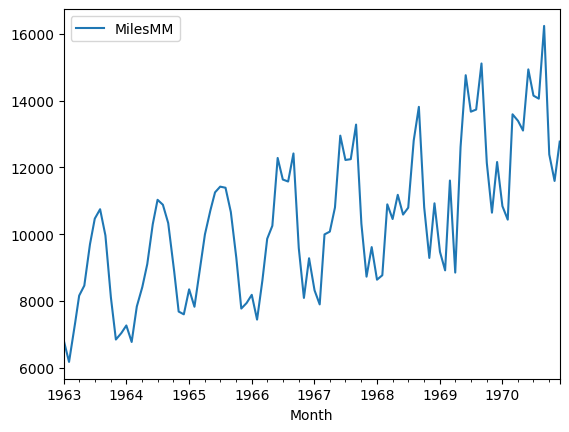

In [17]:
interp_miles_data2.plot() 

In [18]:
poly_interp_miles_data = upsmp_miles_data.interpolate(method='spline', order=2)  
poly_interp_miles_data 

,MilesMM,month_ordinal,year,lag1
Month,,,,
1963-01-01,6827.000000,716606.0,1963.000000,NaN
1963-01-02,6775.328886,716607.0,1962.607682,NaN
1963-01-03,6725.739829,716608.0,1962.610377,NaN
1963-01-04,6678.197709,716609.0,1962.613071,NaN
1963-01-05,6632.702526,716610.0,1962.615766,NaN
...,...,...,...,...
1970-11-27,12532.940278,719493.0,1970.386173,11433.046805
1970-11-28,12590.375575,719494.0,1970.388869,11465.711928
1970-11-29,12649.390645,719495.0,1970.391564,11503.524742


In [19]:
# poly_interp_miles_data.plot() 

In [20]:
# poly_interp_miles_data2 = upsmp_miles_data2.interpolate(method='spline', order=2)  
poly_interp_miles_data2 = upsmp_miles_data2.interpolate(method='spline', order=3)  
poly_interp_miles_data2 

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6762.594766
1963-01-03,6701.625966
1963-01-04,6644.044732
1963-01-05,6589.794611
...,...
1970-11-27,12686.707676
1970-11-28,12712.624659
1970-11-29,12735.626194


<Axes: xlabel='Month'>

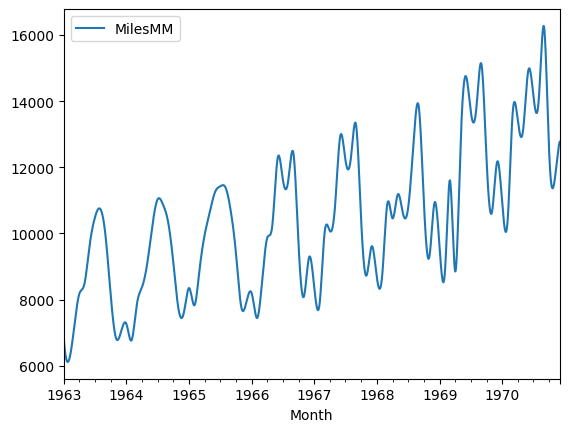

In [21]:
poly_interp_miles_data2.plot() 

# Decomposing Time Series -  

Level - It is the average value in the series.  
Trend - It is the incresaing or decreasing value in the series.  
Seasonality - It is the repeating short term cycle in the series.  
Noise - It is the random variation in the series.  


In [22]:
air_mls_decomp = airl_miles_data2     # type: ignore 
air_mls_decomp 

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [23]:
air_mls_decomp.index = air_mls_decomp['Month'] 
air_mls_decomp 

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462
...,...,...
1970-08-01,1970-08-01,14057
1970-09-01,1970-09-01,16234
1970-10-01,1970-10-01,12389


Additive Model :-  
y(t) = Level + Trend + Seasonality + Noise  

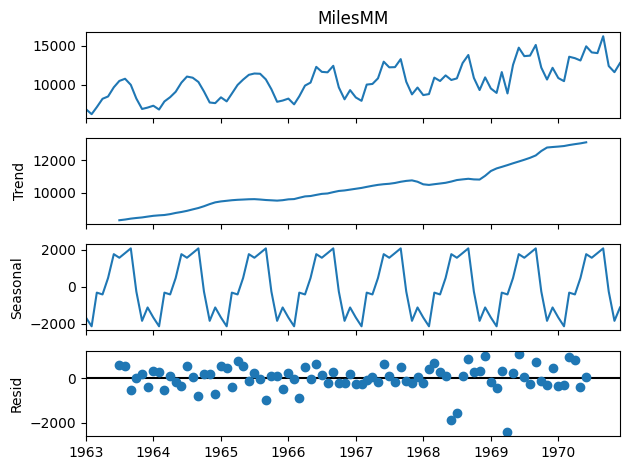

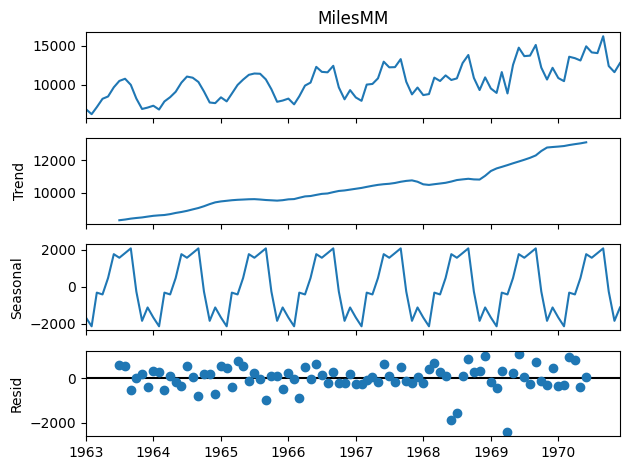

In [24]:
res = seasonal_decompose(air_mls_decomp['MilesMM'], model='additive') 
# res 
res.plot()  

Multiplicative Model :-  
y(t) = Level * Trend * Seasonality * Noise  

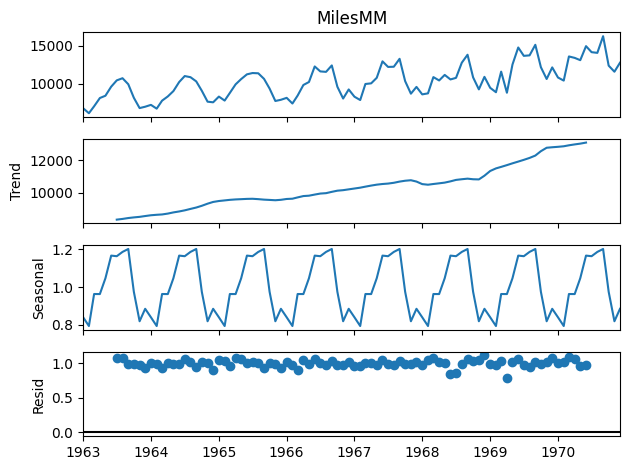

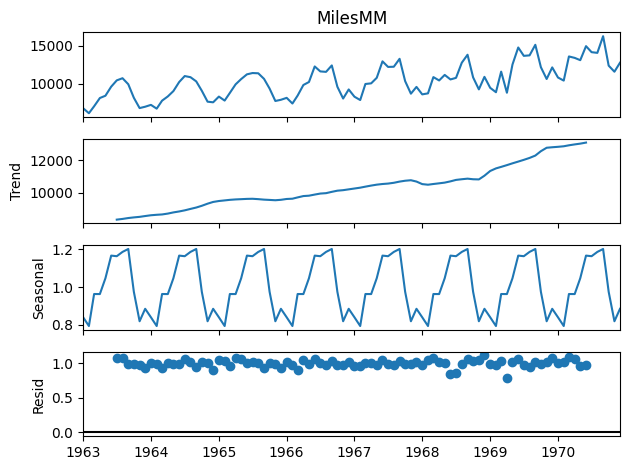

In [25]:
res2 = seasonal_decompose(air_mls_decomp['MilesMM'], model='multiplicative') 
# res2 
res2.plot()  

# Differencing -  
Used to remove any trend and seasonality pattern in the series.  
It is the diference between values in the series. (difference between original series to n_level_lagged series)  
[ e.g., to remove monthly trend pattern in any series data, we can take 12_lag difference ]

In [26]:
air_mls_diff = airl_miles_data2        # type: ignore 
air_mls_diff 

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462
...,...,...
1970-08-01,1970-08-01,14057
1970-09-01,1970-09-01,16234
1970-10-01,1970-10-01,12389


In [27]:
air_mls_diff['lag1'] = air_mls_diff['MilesMM'].shift(1) 
air_mls_diff 

,Month,MilesMM,lag1
Month,,,
1963-01-01,1963-01-01,6827,NaN
1963-02-01,1963-02-01,6178,6827.0
1963-03-01,1963-03-01,7084,6178.0
1963-04-01,1963-04-01,8162,7084.0
1963-05-01,1963-05-01,8462,8162.0
...,...,...,...
1970-08-01,1970-08-01,14057,14147.0
1970-09-01,1970-09-01,16234,14057.0
1970-10-01,1970-10-01,12389,16234.0


In [28]:
air_mls_diff['MilesMM_diff_1'] = air_mls_diff['MilesMM'].diff(periods=1)    # Monthly difference 
air_mls_diff 

,Month,MilesMM,lag1,MilesMM_diff_1
Month,,,,
1963-01-01,1963-01-01,6827,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0
1963-03-01,1963-03-01,7084,6178.0,906.0
1963-04-01,1963-04-01,8162,7084.0,1078.0
1963-05-01,1963-05-01,8462,8162.0,300.0
...,...,...,...,...
1970-08-01,1970-08-01,14057,14147.0,-90.0
1970-09-01,1970-09-01,16234,14057.0,2177.0
1970-10-01,1970-10-01,12389,16234.0,-3845.0


<Axes: xlabel='Month'>

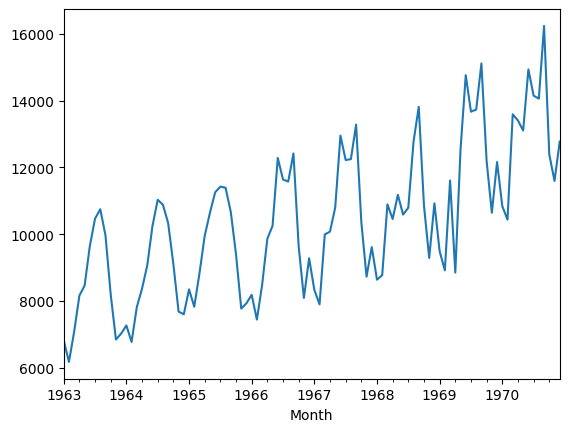

In [29]:
air_mls_diff['MilesMM'].plot() 

<Axes: xlabel='Month'>

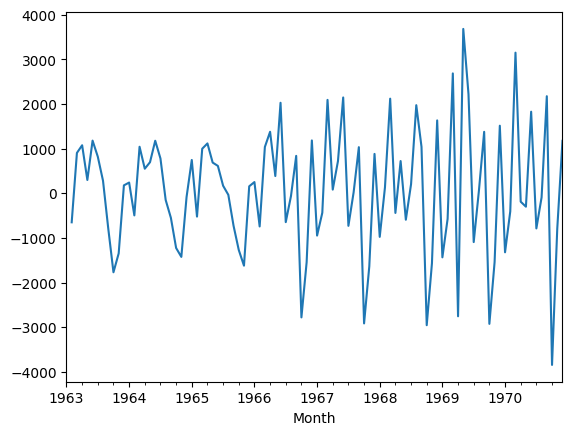

In [30]:
air_mls_diff['MilesMM_diff_1'].plot() 

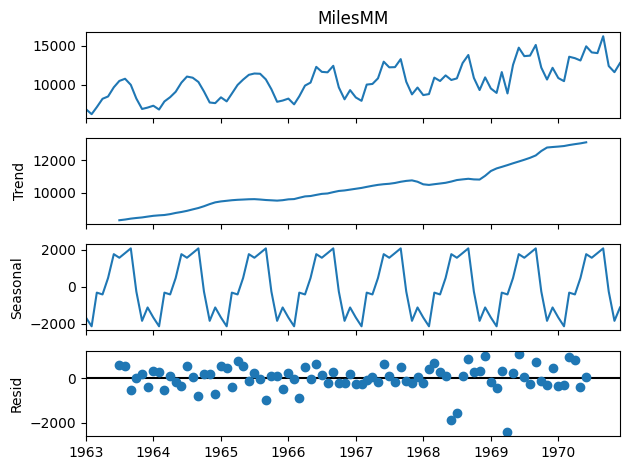

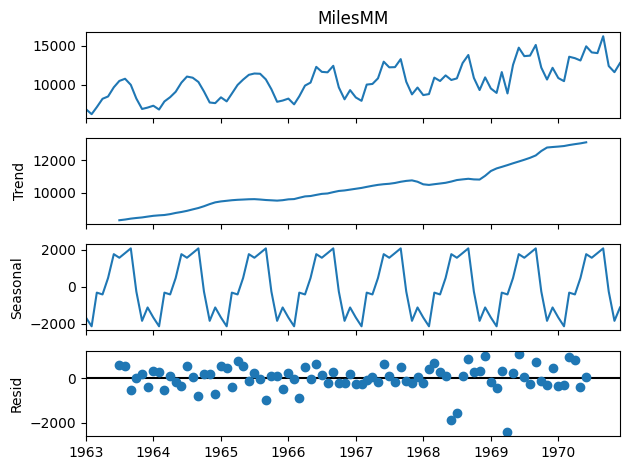

In [31]:
res_a = seasonal_decompose(air_mls_diff['MilesMM'], model='additive') 
res_a.plot() 

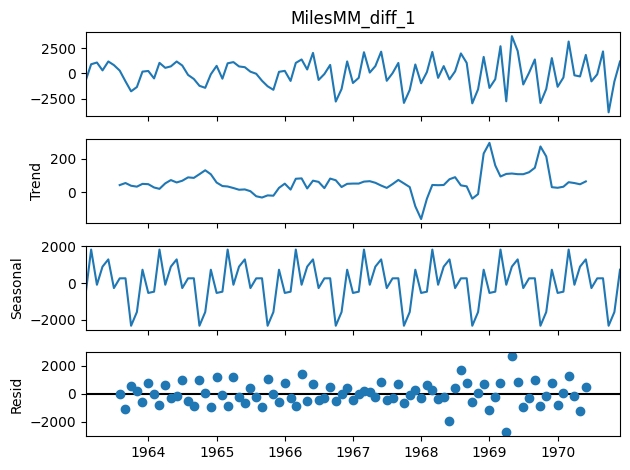

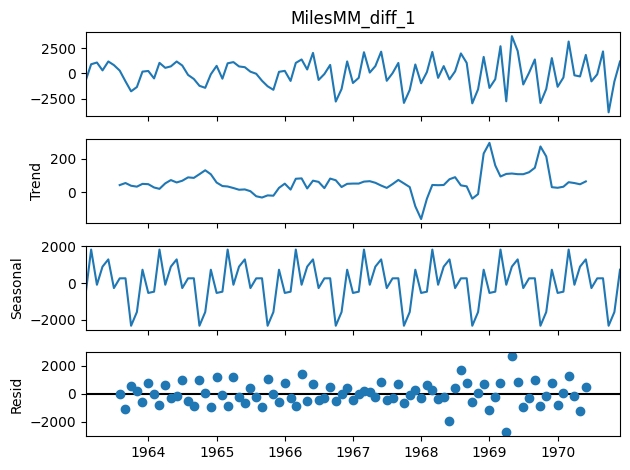

In [32]:
res_b = seasonal_decompose(air_mls_diff.iloc[1:, 3], model='additive') 
res_b.plot() 

In [33]:
air_mls_diff['MilesMM_diff_2'] = air_mls_diff['MilesMM'].diff(periods=12)     # Yearly difference 
air_mls_diff 

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_2
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
...,...,...,...,...,...
1970-08-01,1970-08-01,14057,14147.0,-90.0,326.0
1970-09-01,1970-09-01,16234,14057.0,2177.0,1124.0
1970-10-01,1970-10-01,12389,16234.0,-3845.0,204.0


<Axes: xlabel='Month'>

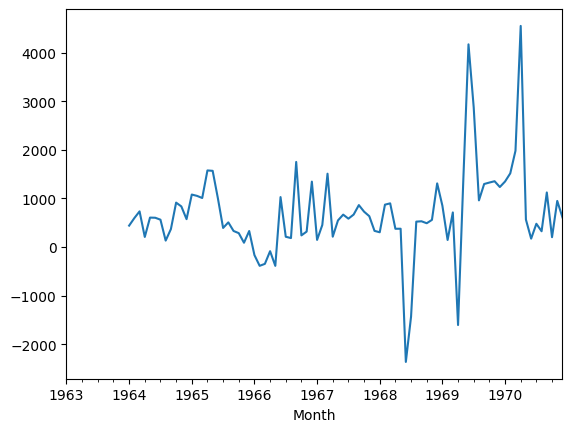

In [34]:
air_mls_diff['MilesMM_diff_2'].plot() 

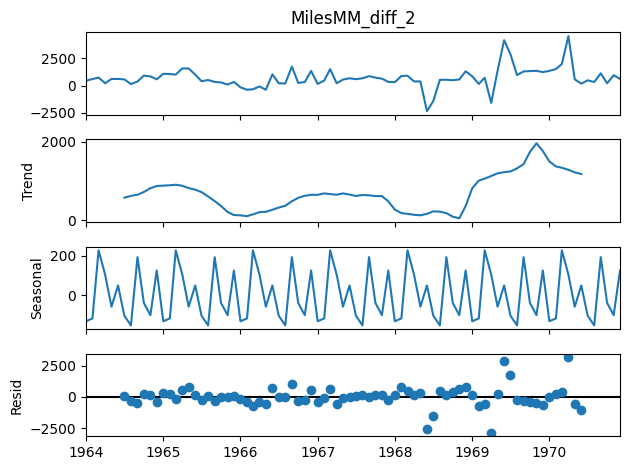

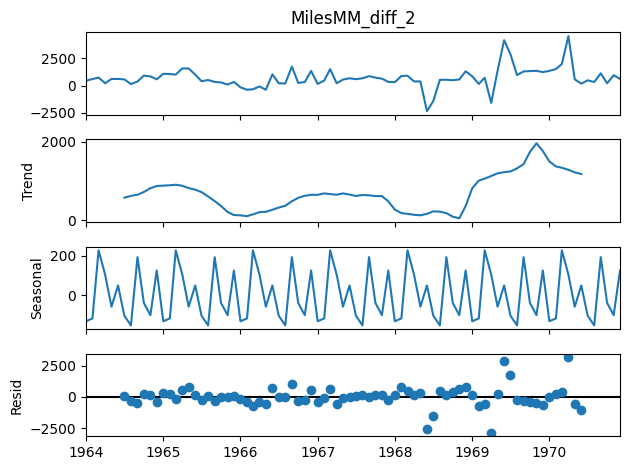

In [35]:
res_c = seasonal_decompose(air_mls_diff.iloc[12:, 4], model='additive') 
res_c.plot()  